##**Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

##**Data Collection and Description**

In [3]:
df = pd.read_csv('/content/Fraud_check.csv')
df.head()

Undergrad Marital.Status  ...  Work.Experience  Urban
0        NO         Single  ...               10    YES
1       YES       Divorced  ...               18    YES
2        NO        Married  ...               30    YES
3       YES         Single  ...               15    YES
4        NO        Married  ...               28     NO

[5 rows x 6 columns]

In [4]:
df = df.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'})
df

Undergrad Marital_Status  ...  Work_Experience  Urban
0          NO         Single  ...               10    YES
1         YES       Divorced  ...               18    YES
2          NO        Married  ...               30    YES
3         YES         Single  ...               15    YES
4          NO        Married  ...               28     NO
..        ...            ...  ...              ...    ...
595       YES       Divorced  ...                7    YES
596       YES       Divorced  ...                2    YES
597        NO       Divorced  ...                0    YES
598       YES        Married  ...               17     NO
599        NO       Divorced  ...               16     NO

[600 rows x 6 columns]

In [5]:
df.describe()

Taxable_Income  City_Population  Work_Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [6]:
df['income_range'] = np.where(df['Taxable_Income']>=30000, 'Good', 'Risky')
df.head()

Undergrad Marital_Status  Taxable_Income  ...  Work_Experience  Urban income_range
0        NO         Single           68833  ...               10    YES         Good
1       YES       Divorced           33700  ...               18    YES         Good
2        NO        Married           36925  ...               30    YES         Good
3       YES         Single           50190  ...               15    YES         Good
4        NO        Married           81002  ...               28     NO         Good

[5 rows x 7 columns]

In [7]:
label_encoder = preprocessing.LabelEncoder()
df_data = df[['Undergrad', 'Marital_Status','Urban']].apply(label_encoder.fit_transform)
df_data = df_data.rename(columns={'Undergrad':'Undergrad_numeric', 'Marital_Status':'Marital_Status_numeric','Urban':'Urban_numeric'})

In [8]:
df_data.head()

Undergrad_numeric  Marital_Status_numeric  Urban_numeric
0                  0                       2              1
1                  1                       0              1
2                  0                       1              1
3                  1                       2              1
4                  0                       1              0

In [9]:
df_data = pd.concat([df,df_data], axis=1, sort=False)
df_data.head()

Undergrad Marital_Status  ...  Marital_Status_numeric  Urban_numeric
0        NO         Single  ...                       2              1
1       YES       Divorced  ...                       0              1
2        NO        Married  ...                       1              1
3       YES         Single  ...                       2              1
4        NO        Married  ...                       1              0

[5 rows x 10 columns]

In [10]:
df_data.drop(columns={'Undergrad','Marital_Status','Urban','Taxable_Income'},axis=1)

City_Population  Work_Experience  ... Marital_Status_numeric  Urban_numeric
0              50047               10  ...                      2              1
1             134075               18  ...                      0              1
2             160205               30  ...                      1              1
3             193264               15  ...                      2              1
4              27533               28  ...                      1              0
..               ...              ...  ...                    ...            ...
595            39492                7  ...                      0              1
596            55369                2  ...                      0              1
597           154058                0  ...                      0              1
598           180083               17  ...                      1              0
599           158137               16  ...                      0              0

[600 rows x 6 columns]

In [11]:
df_data = df_data[['City_Population','Work_Experience','Undergrad_numeric','Marital_Status_numeric','Urban_numeric','income_range']]

In [12]:
colnames = list(df.columns)
colnames

['Undergrad',
 'Marital_Status',
 'Taxable_Income',
 'City_Population',
 'Work_Experience',
 'Urban',
 'income_range']

In [13]:
df_data.income_range.value_counts()

Good     476
Risky    124
Name: income_range, dtype: int64

In [14]:
df_data.isnull().sum()

City_Population           0
Work_Experience           0
Undergrad_numeric         0
Marital_Status_numeric    0
Urban_numeric             0
income_range              0
dtype: int64

In [15]:
x=df_data.iloc[:,0:5]
y=df_data['income_range']

In [16]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

## **Decision Tree Plot**

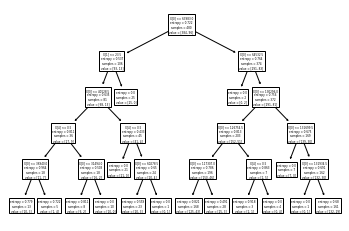

In [18]:
tree.plot_tree(model);

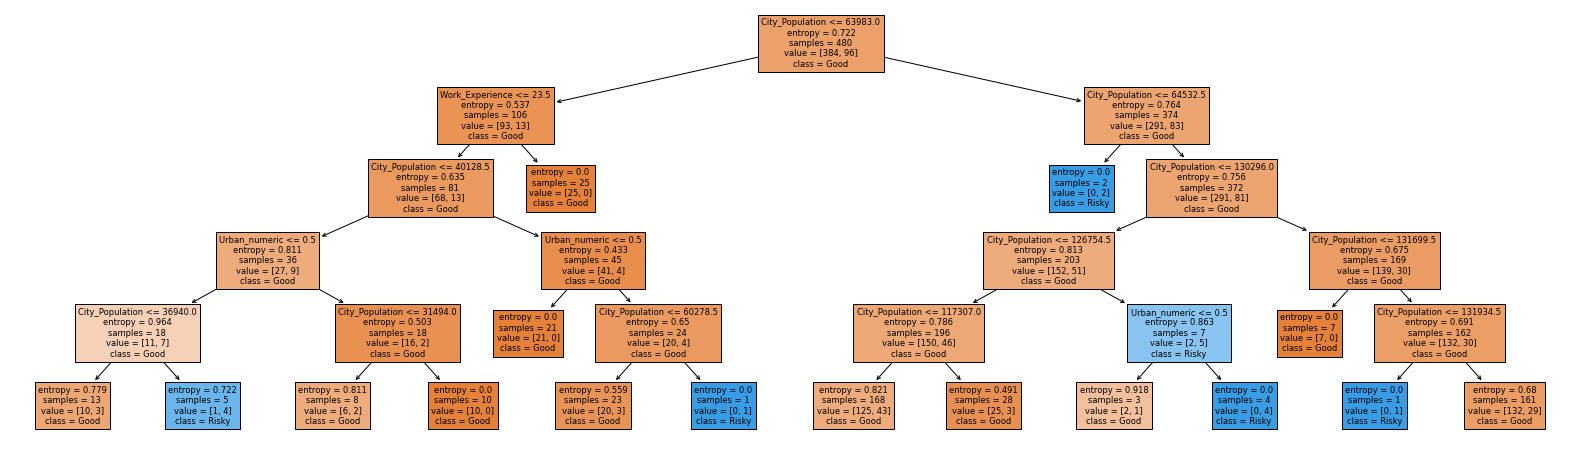

In [23]:
fn=['City_Population',
 'Work_Experience',
 'Undergrad_numeric',
 'Marital_Status_numeric',
 'Urban_numeric']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (28,8))
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

## **Prediction based on Test Data**

In [24]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Good     117
Risky      3
dtype: int64

In [25]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
   

In [26]:
pd.crosstab(y_test,preds) 

col_0         Good  Risky
income_range             
Good            91      1
Risky           26      2

##**Accuracy**

In [27]:
np.mean(preds==y_test)

0.775

##**Decision Tree Model**

In [28]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [29]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

##**Computation and Prediction Accuracy**

In [30]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.775